<a href="https://colab.research.google.com/github/M4700F/CSE-4622-ML-Lab-Term-Project/blob/Maroof/resNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Loading

The dataset contains skin cancer images of the Internal Skin Imaging Collaboration(`ISIC`) archive. The dataset was last updated on `20-06-2019`. It has a balanced number of images of benign and malignant skin moles.

The dataset has a total of 3297 images, each with `.jpg` extension and `224x224` dimension.

The dataset is loaded to a drive folder.



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/data'

Mounted at /content/drive


The name of the dataset folder is `data`. It has two folders `train` and `test`. Each of this folder has two folders `benign` and `malignant`.

Let's assign these folder's path to variables.

In [ ]:
import os

train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

train_benign_path = os.path.join(train_path, 'benign')
train_malignant_path = os.path.join(train_path, 'malignant')

test_benign_path = os.path.join(test_path, 'benign')
test_malignant_path = os.path.join(test_path, 'malignant')

Lets check the dataset structure if it has truly the folders.

In [ ]:
print(f"Dataset folder exists: {os.path.exists(dataset_path)}")
print(f"Train folder exists: {os.path.exists(train_path)}")
print(f"Test folder exists: {os.path.exists(test_path)}")

print("\nTrain folders:")
print(f"    Train/benign exists: {os.path.exists(train_benign_path)}")
print(f"    Train/malignant exists: {os.path.exists(train_malignant_path)}")

print("\nTest folders:")
print(f"    Test/benign exists: {os.path.exists(test_benign_path)}")
print(f"    Test/malignant exists: {os.path.exists(test_malignant_path)}")

Dataset folder exists: True
Train folder exists: True
Test folder exists: True

Train folders:
    Train/benign exists: True
    Train/malignant exists: True

Test folders:
    Test/benign exists: True
    Test/malignant exists: True


Let's check the img count.

In [ ]:
train_benign_count = len([f for f in os.listdir(train_benign_path) if f.endswith('.jpg')])
print(f"Train/Benign images: {train_benign_count}")

train_malignant_count = len([f for f in os.listdir(train_malignant_path) if f.endswith('.jpg')])
print(f"Train/Malignant images: {train_malignant_count}")

test_benign_count = len([f for f in os.listdir(test_benign_path) if f.endswith('.jpg')])
print(f"Test/Benign images: {test_benign_count}")

test_malignant_count = len([f for f in os.listdir(test_malignant_path) if f.endswith('.jpg')])
print(f"Test/Malignant images: {test_malignant_count}")

Train/Benign images: 1440
Train/Malignant images: 1197
Test/Benign images: 360
Test/Malignant images: 300


**Function to load images**

For our experiment, we choose 500 images randomly from the `benign` and `malignant` folders of the `train` folders. We don't touch the `test` folders because they are used for testing purposes. They have to be unseened.

So 500 images from `benign` and 500 images from `malignant`. Total `1000` images. This is called `stratified sampling`, where fixed number of data are collected from each `strata` or groups, here benign and malignant.

This is very important because this ensures that the class distribution is balanced.

Also the images are resized to 224x224 dimension.

In [ ]:
import random
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_SIZE = 224 #224x224
NUM_SAMPLES = 500

In [ ]:
def load_images(folder_path, label, max_samples):
  images = []
  labels = []

  # Get all jpg files
  files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

  # Randomly select max_samples files
  if len(files) > max_samples:
    files = random.sample(files, max_samples)

  print(f"Loading {len(files)} images from {folder_path.split('/')[-1]} folder...")

  for i, filename in enumerate(files):
    try:
      # Load and resize image
      img_path = os.path.join(folder_path, filename)
      img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
      img_array = img_to_array(img)
      # img_array = img_array / 255.0

      images.append(img_array)
      labels.append(label)

      if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{len(files)} images")

    except Exception as e:
      print(f"  Error loading {filename}: {e}")
      continue

  return np.array(images), np.array(labels)


Loading from `train` folder

In [ ]:
train_benign_images, train_benign_labels = load_images(train_benign_path, 0, NUM_SAMPLES) # 0 for benign
train_malignant_images, train_malignant_labels = load_images(train_malignant_path, 1, NUM_SAMPLES) # 1 for malignant

Loading 500 images from benign folder...
  Processed 100/500 images
  Processed 200/500 images
  Processed 300/500 images
  Processed 400/500 images
  Processed 500/500 images
Loading 500 images from malignant folder...
  Processed 100/500 images
  Processed 200/500 images
  Processed 300/500 images
  Processed 400/500 images
  Processed 500/500 images


`axis=0` means stacking the arrays on top of each other increasing the rows/number of samples.

In [ ]:
import numpy as np

# Combining training data
X_train = np.concatenate([train_benign_images, train_malignant_images], axis=0)
y_train = np.concatenate([train_benign_labels, train_malignant_labels], axis=0)

Loading from `test` folder

In [ ]:
test_benign_images, test_benign_labels = load_images(test_benign_path, 0, NUM_SAMPLES) # 0 for benign
test_malignant_images, test_malignant_labels = load_images(test_malignant_path, 1, NUM_SAMPLES) # 1 for malignant

Loading 360 images from benign folder...
  Processed 100/360 images
  Processed 200/360 images
  Processed 300/360 images
Loading 300 images from malignant folder...
  Processed 100/300 images
  Processed 200/300 images
  Processed 300/300 images


In [ ]:
# Combine test data
X_test = np.concatenate([test_benign_images, test_malignant_images], axis=0)
y_test = np.concatenate([test_benign_labels, test_malignant_labels], axis=0)

Dataset Summary

In [ ]:
print(f"Training set:")
print(f"  Total images: {len(X_train)}")
print(f"  Benign images: {np.sum(y_train == 0)}")
print(f"  Malignant images: {np.sum(y_train == 1)}")

Training set:
  Total images: 1000
  Benign images: 500
  Malignant images: 500


In [ ]:
print(f"Test set:")
print(f"  Total images: {len(X_test)}")
print(f"  Benign images: {np.sum(y_test == 0)}")
print(f"  Malignant images: {np.sum(y_test == 1)}")

Test set:
  Total images: 660
  Benign images: 360
  Malignant images: 300


Image specification

In [ ]:
print(f"Image shape: {X_train[0].shape}")
print(f"Pixel value range: [{X_train.min():.3f}, {X_train.max():.3f}]")

Image shape: (224, 224, 3)
Pixel value range: [0.000, 255.000]


Function for display images

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_sample_images(X, y, title="Sample images", num_samples=6):
  fig, axes = plt.subplots(2,3, figsize=(12, 8))
  axes = axes.ravel()

  for i in range(num_samples):
    idx = random.randint(0, len(X) - 1)
    img = X[idx]
    label = 'Malignant' if y[idx] == 1 else 'Benign'
    img_display = img / 255.0

    axes[i].imshow(img_display)
    axes[i].set_title(f'{label}')
    axes[i].axis('off')

  plt.suptitle(title, fontsize=16)
  plt.tight_layout()
  plt.show()

Let's display the images.

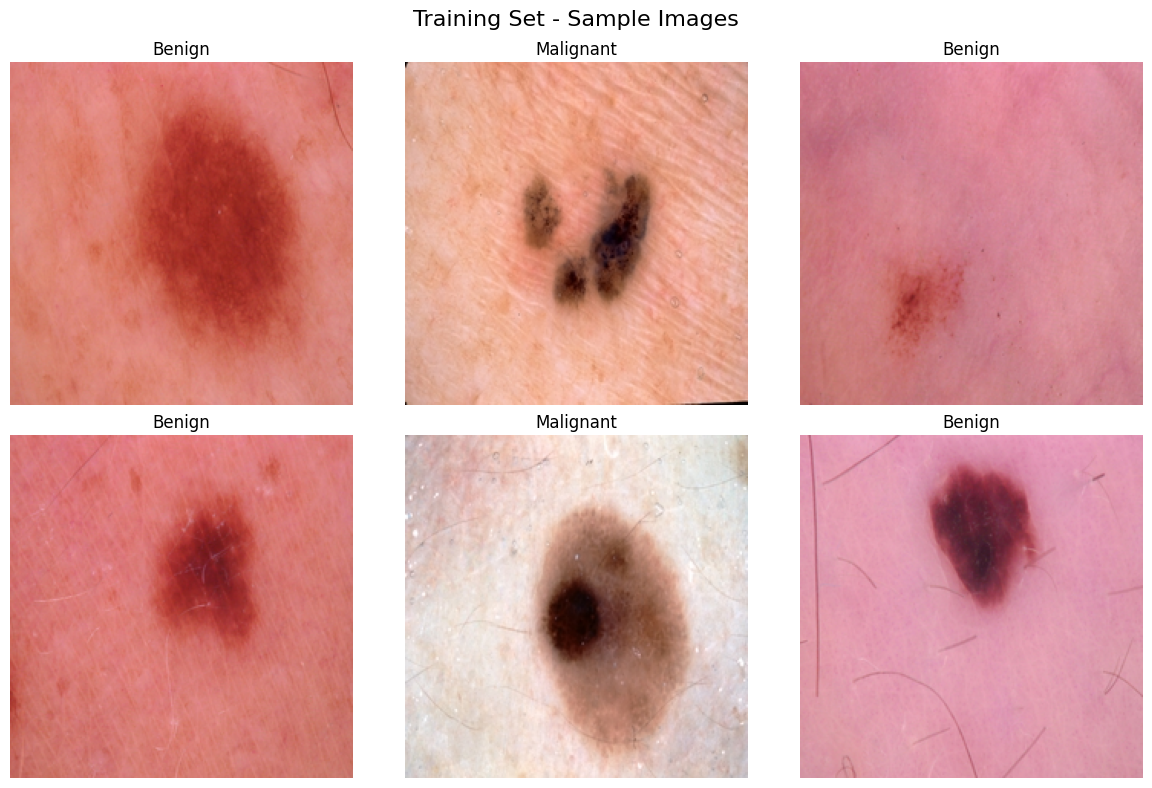

In [ ]:
display_sample_images(X_train, y_train, "Training Set - Sample Images")

# Dataset Preparation



1.   One-hot encoding the data
2.   Data augmentation



Importing the necessary libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**One-hot Encoding**

One-hot encoding is a process where categorical variables are converted into binary vectors.

Imagine there are 3 classes cat, dog, rabbit each has label 0, 1, 2 accordingly.

One-hot encoding convert the three class into binary vectors.

Cat    → [1, 0, 0]

Dog    → [0, 1, 0]

Rabbit → [0, 0, 1]

This helps machine learing algorithm to make better predicitons.

Here we converts our strings labels using `LabelEncoder` from sklearn's library.

LabelEncoder identifies all unique labels using `fit()` and then sort them lexicographically (alphabetically) then assigns integers starting from 0 using `transform()`.

Our labels are already in 0 and 1. But if the labels were like 'benign', 'malignant' then 0 would be assigned to 'benign' and 1 would be assigned to 'malignant' because b comes before m.

And to one-hot encoding we use `to_categorical`


In [ ]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding (categorical)
y_train_onehot = to_categorical(y_train_encoded, num_classes=2)
y_test_onehot = to_categorical(y_test_encoded, num_classes=2)

print(f"Original labels shape: {y_train.shape}")
print(f"One-hot encoded labels shape: {y_train_onehot.shape}")

Original labels shape: (1000,)
One-hot encoded labels shape: (1000, 2)


In [ ]:
# show some examples
print(f"Example - Original: {y_train[:5]} -> One-hot: {y_train_onehot[:5]}")

Example - Original: [0 0 0 0 0] -> One-hot: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Now let's split the training data into 70/30. We use `stratified` sampling here also to maintain class balancing.

In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train_onehot,
    test_size=0.3,
    random_state=42,
    stratify=y_train_encoded
)

In [ ]:
print(f"Final training set: {len(X_train_final)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Final training set: 700 images
Validation set: 300 images
Test set: 660 images


Let's see the class distribution in training set and validation set.

Here np.argmax(y_train_final, axis=1) converts the one-hot encoding to normal labels [0, 1, 0]

In [ ]:
print(f"Class distribution in final training set:")
print(f"  Benign: {np.sum(np.argmax(y_train_final, axis=1) == 0)}")
print(f"  Malignant: {np.sum(np.argmax(y_train_final, axis=1) == 1)}")

Class distribution in final training set:
  Benign: 350
  Malignant: 350


In [ ]:
print(f"Class distribution in validation set:")
print(f"  Benign: {np.sum(np.argmax(y_val, axis=1) == 0)}")
print(f"  Malignant: {np.sum(np.argmax(y_val, axis=1) == 1)}")

Class distribution in validation set:
  Benign: 150
  Malignant: 150


# Data Augmentation

We use data augmentation to change the present images. We set the rotation range of the image 15. Images that have been rotated, scaled, cropped and flipped has led to many models to misclassifing images. By using augmented data, it can train the CNN model to better classify the images.

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# Create data generators
# Training data generator with augmentation

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,         # Rotate images by up to 15 degrees
    width_shift_range=0.1,     # Shift images horizontally
    height_shift_range=0.1,    # Shift images vertically
    horizontal_flip=True,      # Flip images horizontally
    zoom_range=0.1,            # Zoom in/out
    shear_range=0.1,           # Shear transformation
    fill_mode='nearest'       # Fill missing pixels
    #rescale=1.0                # Images are already normalized
)

No augmentation in Validation and test data generators

In [ ]:
#val_datagen = ImageDataGenerator(rescale=1.0)
#test_datagen = ImageDataGenerator(rescale=1.0)

# Validation data generator (no augmentation, but WITH preprocessing)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # ← ALSO CRUCIAL FOR VALIDATION!
)

# Test data generator (no augmentation, but WITH preprocessing)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # ← AND FOR TESTING!
)

In [ ]:
BATCH_SIZE = 32

In [ ]:
# Training generator (with augmentation)
train_generator = train_datagen.flow(
    X_train_final, y_train_final,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Validation generator (no augmentation)
val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Test generator (no augmentation)
test_generator = test_datagen.flow(
    X_test, y_test_onehot,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
print(f"   Data generators created with batch size: {BATCH_SIZE}")
print(f"   Training batches per epoch: {len(train_generator)}")
print(f"   Validation batches per epoch: {len(val_generator)}")
print(f"   Test batches: {len(test_generator)}")

   Data generators created with batch size: 32
   Training batches per epoch: 22
   Validation batches per epoch: 10
   Test batches: 21


   Displaying sample augmented images...


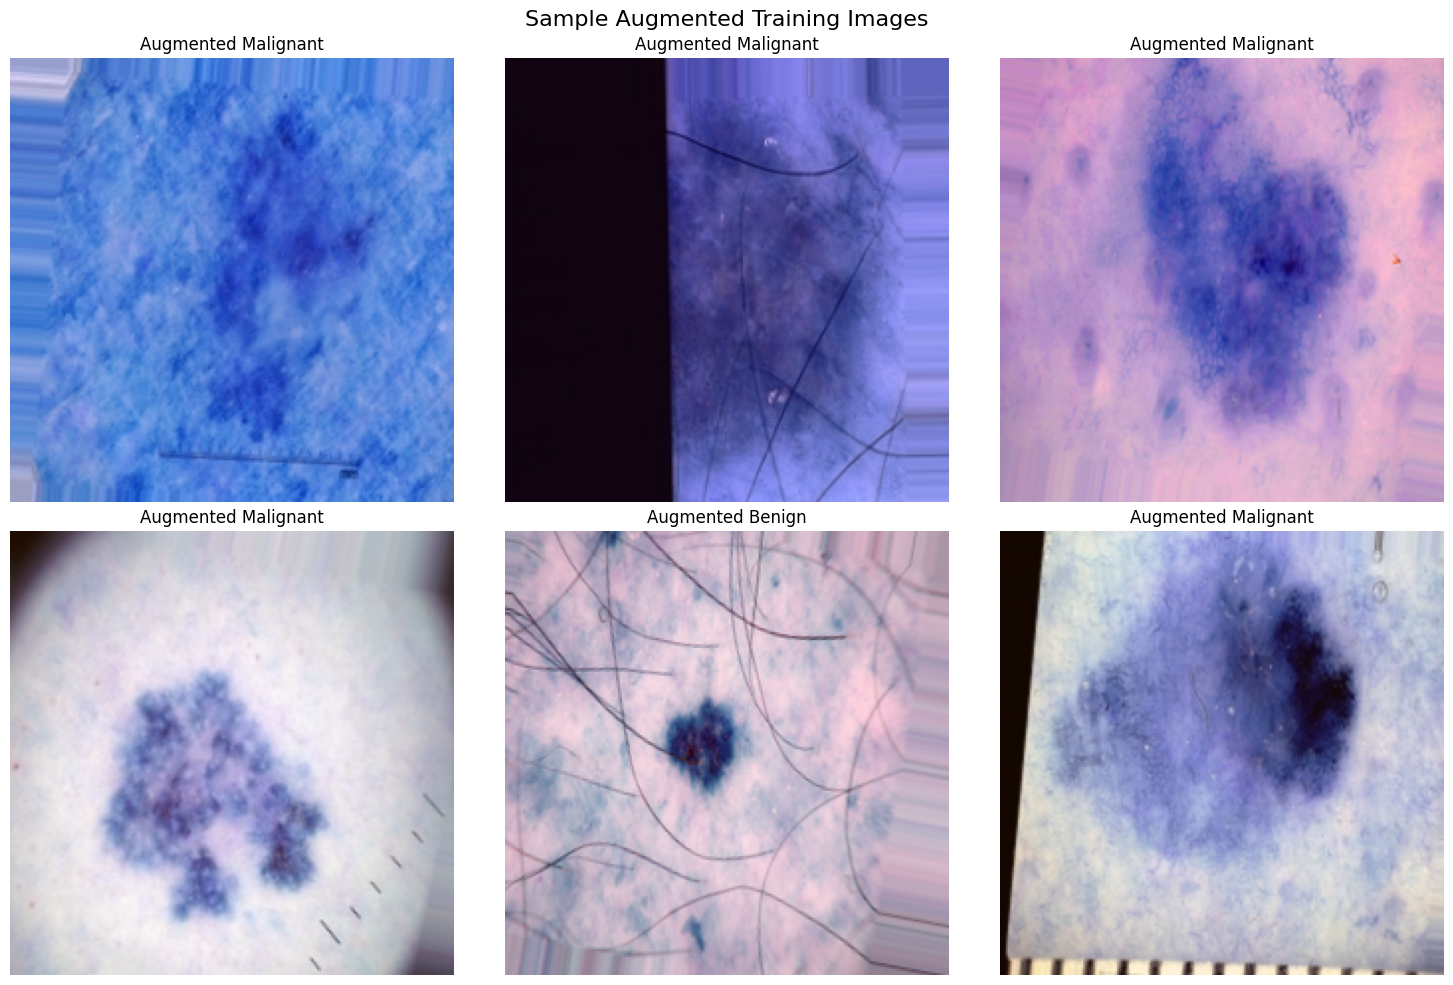

In [ ]:
def show_augmented_images(generator, num_images=6):
    """Display original and augmented images"""
    # Get a batch from the generator
    batch_images, batch_labels = next(generator)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i in range(min(num_images, len(batch_images))):
        img = batch_images[i]
        label = np.argmax(batch_labels[i])
        label_name = 'Malignant' if label == 1 else 'Benign'
        img_display = (img - img.min()) / (img.max() - img.min())

        axes[i].imshow(img_display)
        axes[i].set_title(f'Augmented {label_name}')
        axes[i].axis('off')

    plt.suptitle('Sample Augmented Training Images', fontsize=16)
    plt.tight_layout()
    plt.show()

print("   Displaying sample augmented images...")
show_augmented_images(train_generator)

Dataset is prepared for training.


1.   Labels converted to one-hot encoding
2.   Data split using straified sampling
3.   Data augmentation applied to training set
4.   Data generators created for training, validation and testing



# Transfer Learning using ResNet-50

In [ ]:
# Loading necessary libraries

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Let's load the pre-trained ResNet-50 base model without the top fully-connected layers.

Because this ResNet-50 is pretrained on `ImageNet` data which has 1000 classes. But we need only two classes. So we exclude the outer layer of the model. And build our own customized output layer.

We then freeze the model's layer. This is a clever techique. The ResNet-50 already trained on ImageNet dataset which is a huge dataset. This model now inherits a great potential of solving any classification problem. The inner model's parameter are fully optimized. They gradient descented to the minimum. They achieve a kind of super power. Isn't that amazing.

We will now utilize those parameters. We do not touch them. We will change the output layer for our preferences. The output will be simple so it will take less computation power.

In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

print(f"ResNet-50 base model loaded successfully")
print(f"Base model input shape: {base_model.input_shape}")
print(f"Base model output shape: {base_model.output_shape}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet-50 base model loaded successfully
Base model input shape: (None, 224, 224, 3)
Base model output shape: (None, 7, 7, 2048)


In [ ]:
# Let's freeze the model's layers
base_model.trainable = False

print(f"Base model layers frozen: {not base_model.trainable}")
print(f"Total layers in base model")

Base model layers frozen: True
Total layers in base model


Let's build the complete model with custom top layers

In [ ]:
inputs = base_model.input

x = base_model(inputs, training=False) # Set training=False to freeze batch norm

# Global Average Pooling instead of Flatten (more efficient and reduces overfitting)
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)

# Add dropout for regularization (keeping consistent with the paper)
x = Dropout(0.25)(x)

# Add dense layers (keeping consistent with the paper)
# Dense layer with 128 neurons and ReLU activation
x = Dense(128, activation='relu', name='dense_128')(x)
x = Dropout(0.25)(x) # Dropout after firest dense layer

x = Dense(64, activation='relu', name='dense_64')(x)
# No dropout before final layer

# Output layer with 2 neurons and softmax activation
outputs = Dense(2, activation='softmax', name='predictions')(x)

# Create the complete model
model = Model(inputs, outputs)

print("Model Architecture created successfully")

Model Architecture created successfully


Let's see the model summary

In [ ]:
print("\nModel Summary:")
print(f"Total parameters: {model.count_params():,}")
print(f"Trainable parameters: {sum(np.prod(p.shape) for p in model.trainable_variables):,}")


Model Summary:
Total parameters: 23,858,370
Trainable parameters: 270,658


Let's compile the model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("ResNet-50 model compiled successfully")

ResNet-50 model compiled successfully


Model Architecture overview

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,370 (91.01 MB)

 Trainable params: 270,658 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Step 7: Visualize model architecture (optional)
try:
    tf.keras.utils.plot_model(
        model,
        to_file='resnet50_model.png',
        show_shapes=True,
        show_layer_names=True,
        dpi=150
    )
    print("\n✓ Model architecture diagram saved as 'resnet50_model.png'")
except:
    print("\n! Could not save model diagram (graphviz not installed)")


✓ Model architecture diagram saved as 'resnet50_model.png'


Setting up callbacks for training

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

In [ ]:
import time

Setting up training parameters

In [ ]:
LEARNING_RATE = 0.0001  # Learning rate set to 0.0001 as mentioned in paper
EPOCHS = 15            # Number of iterations set to 15 as mentioned in paper
BATCH_SIZE = 32         # Batch size set to 32 as mentioned in paper

print(f"Training parameters:")
print(f"- Learning rate: {LEARNING_RATE}")
print(f"- Epochs: {EPOCHS}")
print(f"- Batch size: {BATCH_SIZE}")
print(f"- Optimizer: Adam")
print(f"- Loss function: Categorical crossentropy")
print(f"- Metric: Accuracy")

Training parameters:
- Learning rate: 0.0001
- Epochs: 15
- Batch size: 32
- Optimizer: Adam
- Loss function: Categorical crossentropy
- Metric: Accuracy


In [ ]:
# Step 3: Display training setup
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

print(f"\nTraining setup:")
print(f"- Training samples: {len(X_train_final)}")
print(f"- Validation samples: {len(X_val)}")
print(f"- Steps per epoch: {steps_per_epoch}")
print(f"- Validation steps: {validation_steps}")


Training setup:
- Training samples: 700
- Validation samples: 300
- Steps per epoch: 22
- Validation steps: 10


Let's start training. Yahoo!

In [ ]:
# Record training start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

# Record training end time
end_time = time.time()
training_time = end_time - start_time

print(f"\n✓ Training completed!")
print(f"Total training time: {training_time/60:.2f} minutes")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4841 - loss: 1.4351 - val_accuracy: 0.5800 - val_loss: 0.7049 - learning_rate: 1.0000e-04
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 380ms/step - accuracy: 0.6214 - loss: 0.6888 - val_accuracy: 0.7733 - val_loss: 0.5058 - learning_rate: 1.0000e-04
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 396ms/step - accuracy: 0.7188 - loss: 0.5342 - val_accuracy: 0.8033 - val_loss: 0.4355 - learning_rate: 1.0000e-04
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step - accuracy: 0.7697 - loss: 0.4942 - val_accuracy: 0.7900 - val_loss: 0.4129 - learning_rate: 1.0000e-04
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step - accuracy: 0.7894 - loss: 0.4756 - val_accuracy: 0.8367 - val_loss: 0.3807 - learning_rate: 1.0000e-04
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.8190 - loss: 0.4288 - val_accuracy: 0.8100 - val_loss: 0.3740 - learning_rate: 1.0000e-04
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy

Let's display the training results

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8571 (85.71%)
Final Validation Accuracy: 0.8400 (84.00%)
Final Training Loss: 0.3228
Final Validation Loss: 0.3386


Plotting the training accuracy, val_accuracy vs epoch

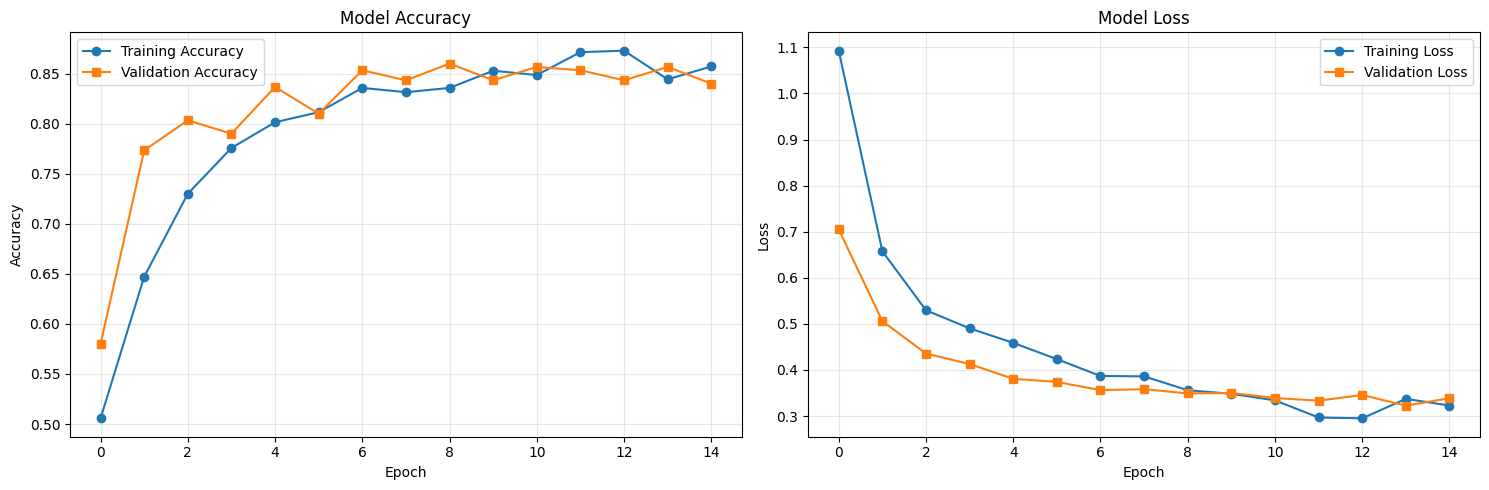

In [ ]:
def plot_training_history(history):
    """Plot training and validation accuracy and loss"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)


Let's evalutate based on test set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"\n Test Results")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8119 - loss: 0.3917

 Test Results
Test Accuracy: 0.8409 (84.09%)
Test Loss: 0.3597


In [ ]:
# Display detailed training metrics
print(f"\n7. Detailed Training Metrics:")
print("="*50)
print(f"{'Epoch':<6} {'Train Acc':<10} {'Val Acc':<10} {'Train Loss':<12} {'Val Loss':<10}")
print("-"*50)

for i in range(len(history.history['accuracy'])):
    epoch = i + 1
    train_acc = history.history['accuracy'][i]
    val_acc = history.history['val_accuracy'][i]
    train_loss = history.history['loss'][i]
    val_loss = history.history['val_loss'][i]

    print(f"{epoch:<6} {train_acc:<10.4f} {val_acc:<10.4f} {train_loss:<12.4f} {val_loss:<10.4f}")


7. Detailed Training Metrics:
Epoch  Train Acc  Val Acc    Train Loss   Val Loss  
--------------------------------------------------
1      0.5057     0.5800     1.0927       0.7049    
2      0.6471     0.7733     0.6573       0.5058    
3      0.7300     0.8033     0.5294       0.4355    
4      0.7757     0.7900     0.4903       0.4129    
5      0.8014     0.8367     0.4588       0.3807    
6      0.8114     0.8100     0.4234       0.3740    
7      0.8357     0.8533     0.3870       0.3562    
8      0.8314     0.8433     0.3860       0.3583    
9      0.8357     0.8600     0.3559       0.3490    
10     0.8529     0.8433     0.3482       0.3500    
11     0.8486     0.8567     0.3340       0.3391    
12     0.8714     0.8533     0.2968       0.3333    
13     0.8729     0.8433     0.2950       0.3456    
14     0.8443     0.8567     0.3373       0.3225    
15     0.8571     0.8400     0.3228       0.3386    


Let's save the model.

In [ ]:
print(f"\n Saving the trained model")

model.save('resnet50_skin_cancer_model.keras')
print("✓ Model saved as 'resnet50_skin_cancer_model.keras'")


 Saving the trained model
✓ Model saved as 'resnet50_skin_cancer_model.keras'


Let's display the training summary

In [ ]:
# Training summary
print(f"\n Training Summary:")
print("="*50)
print(f"✓ Model trained successfully for {EPOCHS} epochs")
print(f"✓ Training time: {training_time/60:.2f} minutes")
print(f"✓ Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"✓ Final test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

if test_accuracy >= 0.85:  # Check if close to paper's 88% accuracy
    print(f"✓ Model achieved good performance (≥85% accuracy)")
    print("✓ Model is ready for adversarial attack testing!")
else:
    print(f"! Model accuracy is below 85%. Consider:")
    print("  - Training for more epochs")
    print("  - Adjusting learning rate")
    print("  - Fine-tuning hyperparameters")

print(f"\nVariables created:")
print("- history: Training history with metrics")
print("- model: Trained ResNet-50 model")
print(f"- test_accuracy: Final test accuracy ({test_accuracy:.4f})")

print(f"\nNext step: Implement FGSM adversarial attack!")
print("="*60)


 Training Summary:
✓ Model trained successfully for 15 epochs
✓ Training time: 3.07 minutes
✓ Best validation accuracy: 0.8600
✓ Final test accuracy: 0.8409 (84.09%)
! Model accuracy is below 85%. Consider:
  - Training for more epochs
  - Adjusting learning rate
  - Fine-tuning hyperparameters

Variables created:
- history: Training history with metrics
- model: Trained ResNet-50 model
- test_accuracy: Final test accuracy (0.8409)

Next step: Implement FGSM adversarial attack!


# Results

Detailed results with accuracy, recall, precision, F1-score.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
# Make predictions on test set
print("1. Making predictions on test set...")

# Get predictions from the model
test_predictions = model.predict(test_generator, verbose=1)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Get true labels
test_true_classes = np.argmax(y_test_onehot, axis=1)

print(f"✓ Predictions completed")
print(f"Test samples: {len(test_pred_classes)}")

1. Making predictions on test set...
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step
✓ Predictions completed
Test samples: 660


In [ ]:
# Define class names
class_names = ['Benign', 'Malignant']

# Generate classification report
report = classification_report(
    test_true_classes,
    test_pred_classes,
    target_names=class_names,
    output_dict=True
)

# Create formatted classification report table
print(f"Classification Results of the Trained Model")
print("="*70)
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<12}")
print("-"*70)

for class_name in class_names:
    precision = report[class_name]['precision'] * 100
    recall = report[class_name]['recall'] * 100
    f1 = report[class_name]['f1-score'] * 100
    support = int(report[class_name]['support'])

    print(f"{class_name:<12} {precision:<12.0f}% {recall:<12.0f}% {f1:<12.0f}% {support:<12}")

# Overall accuracy
overall_accuracy = report['accuracy'] * 100
print("-"*70)
print(f"{'Overall':<12} {'Accuracy:':<12} {overall_accuracy:<12.0f}%")

Classification Results of the Trained Model
Class        Precision    Recall       F1-Score     Support     
----------------------------------------------------------------------
Benign       91          % 79          % 84          % 360         
Malignant    78          % 90          % 84          % 300         
----------------------------------------------------------------------
Overall      Accuracy:    84          %


In [ ]:
# Display detailed metrics as mentioned in paper
print(f"   Detailed Performance Analysis:")
print("="*50)

precision_benign = report['Benign']['precision'] * 100
precision_malignant = report['Malignant']['precision'] * 100
recall_benign = report['Benign']['recall'] * 100
recall_malignant = report['Malignant']['recall'] * 100
f1_benign = report['Benign']['f1-score'] * 100
f1_malignant = report['Malignant']['f1-score'] * 100

print(f"PRECISION (Model's accuracy of positive predictions):")
print(f"- Benign images correctly predicted: {precision_benign:.0f}%")
print(f"- Malignant images correctly predicted: {precision_malignant:.0f}%")

print(f"\nRECALL (Ability to find all positive instances):")
print(f"- Benign recall: {recall_benign:.0f}%")
print(f"- Malignant recall: {recall_malignant:.0f}%")

print(f"\nF1-SCORE (Percentage of positive predictions that were correct):")
print(f"- Benign F1-score: {f1_benign:.0f}%")
print(f"- Malignant F1-score: {f1_malignant:.0f}%")

print(f"\nSUPPORT (Number of actual occurrences):")
print(f"- Benign images: {int(report['Benign']['support'])}")
print(f"- Malignant images: {int(report['Malignant']['support'])}")

   Detailed Performance Analysis:
PRECISION (Model's accuracy of positive predictions):
- Benign images correctly predicted: 91%
- Malignant images correctly predicted: 78%

RECALL (Ability to find all positive instances):
- Benign recall: 79%
- Malignant recall: 90%

F1-SCORE (Percentage of positive predictions that were correct):
- Benign F1-score: 84%
- Malignant F1-score: 84%

SUPPORT (Number of actual occurrences):
- Benign images: 360
- Malignant images: 300


   Creating Confusion Matrix (Figure 3)...


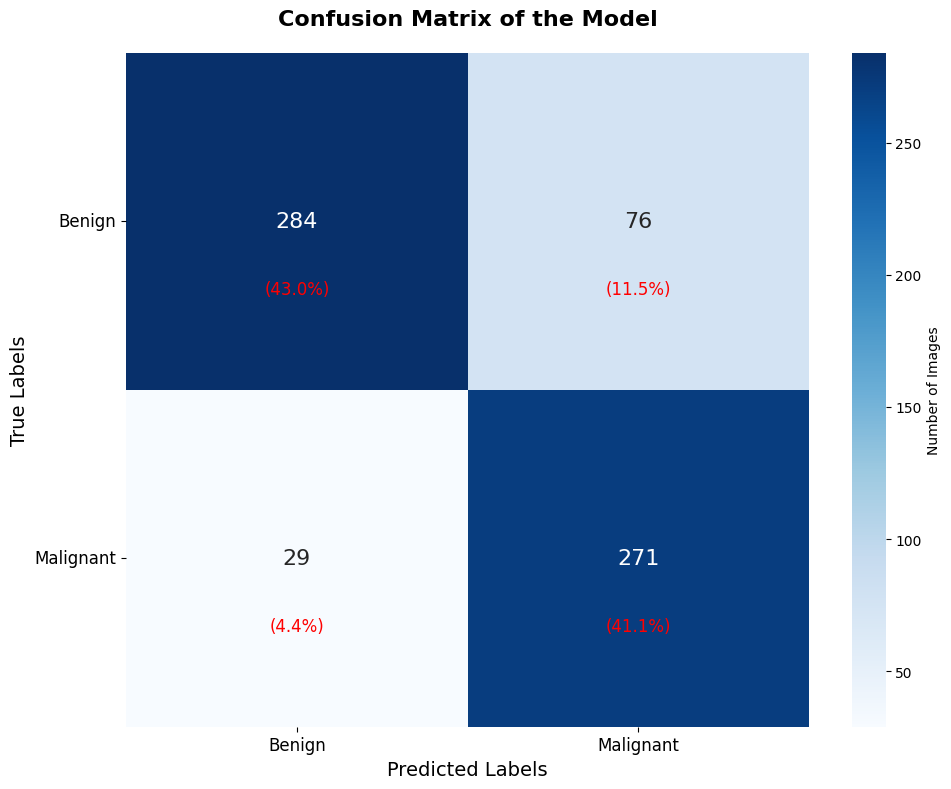

In [ ]:
# Create Confusion Matrix (Figure 3)
print(f"   Creating Confusion Matrix (Figure 3)...")

def plot_confusion_matrix():
    """Create Figure 3: Confusion matrix"""
    # Calculate confusion matrix
    cm = confusion_matrix(test_true_classes, test_pred_classes)

    # Create confusion matrix plot
    plt.figure(figsize=(10, 8))

    # Use seaborn for better visualization
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={'size': 16}, cbar_kws={'label': 'Number of Images'})

    plt.title('Confusion Matrix of the Model', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, rotation=0)

    # Add percentage annotations
    total = cm.sum()
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            percentage = (cm[i, j] / total) * 100
            plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)',
                    ha='center', va='center', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

    return cm

cm = plot_confusion_matrix()

In [ ]:
# Calculate and display confusion matrix metrics
print(f"Confusion Matrix Analysis:")
print("="*50)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate rates as mentioned in paper
benign_true_positive_rate = (cm[0,0] / (cm[0,0] + cm[0,1])) * 100
benign_false_positive_rate = (cm[0,1] / (cm[0,0] + cm[0,1])) * 100

malignant_true_negative_rate = (cm[1,1] / (cm[1,0] + cm[1,1])) * 100
malignant_false_negative_rate = (cm[1,0] / (cm[1,0] + cm[1,1])) * 100

print(f"BENIGN Classification:")
print(f"- True Positive Rate: {benign_true_positive_rate:.0f}% ({cm[0,0]} images)")
print(f"- False Positive Rate: {benign_false_positive_rate:.0f}% ({cm[0,1]} images)")

print(f"\nMALIGNANT Classification:")
print(f"- True Negative Rate: {malignant_true_negative_rate:.0f}% ({cm[1,1]} images)")
print(f"- False Negative Rate: {malignant_false_negative_rate:.0f}% ({cm[1,0]} images)")

Confusion Matrix Analysis:
BENIGN Classification:
- True Positive Rate: 79% (284 images)
- False Positive Rate: 21% (76 images)

MALIGNANT Classification:
- True Negative Rate: 90% (271 images)
- False Negative Rate: 10% (29 images)


In [ ]:
# Summary of Results
print(f"RESULTS SUMMARY:")
print("="*60)
print(f"✓ Overall Model Accuracy: {overall_accuracy:.0f}%")
print(f"✓ High classification accuracy achieved")
print(f"✓ Model demonstrates strong performance on both classes")
print(f"✓ Training and validation curves show good learning progression")
print(f"✓ Minimal overfitting observed")

# Create summary table
summary_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Benign': [f"{precision_benign:.0f}%", f"{recall_benign:.0f}%",
               f"{f1_benign:.0f}%", f"{int(report['Benign']['support'])}"],
    'Malignant': [f"{precision_malignant:.0f}%", f"{recall_malignant:.0f}%",
                  f"{f1_malignant:.0f}%", f"{int(report['Malignant']['support'])}"]
}

summary_df = pd.DataFrame(summary_data)
print(f"\nSUMMARY TABLE:")
print(summary_df.to_string(index=False))

print(f"\n✓ Model is ready for adversarial attack testing!")
print(f"✓ Current accuracy ({overall_accuracy:.0f}%) will be compared against")
print(f"  post-attack accuracy to demonstrate FGSM impact")

print(f"\nVariables created:")
print("- test_pred_classes: Model predictions on test set")
print("- test_true_classes: True labels for test set")
print("- report: Classification report dictionary")
print("- cm: Confusion matrix")
print("="*60)

RESULTS SUMMARY:
✓ Overall Model Accuracy: 84%
✓ High classification accuracy achieved
✓ Model demonstrates strong performance on both classes
✓ Training and validation curves show good learning progression
✓ Minimal overfitting observed

SUMMARY TABLE:
   Metric Benign Malignant
Precision    91%       78%
   Recall    79%       90%
 F1-Score    84%       84%
  Support    360       300

✓ Model is ready for adversarial attack testing!
✓ Current accuracy (84%) will be compared against
  post-attack accuracy to demonstrate FGSM impact

Variables created:
- test_pred_classes: Model predictions on test set
- test_true_classes: True labels for test set
- report: Classification report dictionary
- cm: Confusion matrix


# Implementing FGSM Attack to the trained ResNet CNN

**Generating Image Adversary**

To implement the attack, we used our model to make predictions on the input image and then compute the loss. From there, we calculate the gradient of loss w.r.t input image and compute the sign of the gradient. Then, we construct the image adversary by adding the image with the sign of the gradient.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**Function of creating adversarial pattern of the image using FGSM.**

Basically here we calculate the sign of the gradient.

In [ ]:
# def create_adversarial_pattern(input_image, input_label, model):
#   """
#     Create adversarial pattern using FGSM attack
#   """
#   # Convert input to tensor
#   input_image = tf.cast(input_image, tf.float32)

#   with tf.GradientTape() as tape:
#     tape.watch(input_image)
#     # preprocessed_image = preprocess_input(tf.cast(input_image, tf.float32))
#     # Make prediction
#     prediction = model(preprocess_input)
#     # Calculate loss
#     loss = tf.keras.losses.categorical_crossentropy(input_label, prediction)

#   # Get the gradient of the loss w.r.t to the input image
#   gradient = tape.gradient(loss, input_image)

#   # Get the sign of the gradient to create the perturbation
#   signed_grad = tf.sign(gradient)

#   return signed_grad

**Function to create adversarial example image**

In [ ]:
def generate_adversarial_examples(model, X_test, y_test_onehot, epsilon=0.01):
  """
    Generate adversarial examples using FGSM attack

    Args:
        model: Trained CNN model
        X_test: Test images
        y_test_onehot: Test labels (one-hot encoded)
        epsilon: Perturbation magnitude

    Returns:
        adversarial_images: Generated adversarial examples
  """
  print(f"Generating adversarial examples with epsilon = {epsilon}...")

  adversarial_images = []

  for i in range(len(X_test)):
      # Get single image and label
      raw_image = X_test[i:i+1]          # Keep batch dimension
      label = y_test_onehot[i:i+1]

      raw_tensor = tf.convert_to_tensor(raw_image)

      with tf.GradientTape() as tape:
        tape.watch(raw_tensor)
        preprocessed_tensor = preprocess_input(raw_tensor)
        prediction = model(preprocessed_tensor)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)

      gradient = tape.gradient(loss, raw_tensor)
      signed_gradient = tf.sign(gradient)

      # Get the gradient of the loss w.r.t the input

      # # Preprocess for the model
      # preprocessed_image = preprocess_input(raw_image.copy())

      # # Create adversarial pattern
      # perturbations = create_adversarial_pattern(preprocessed_image, label, model)

      # CRITICAL: Apply perturbation to RAW image, not preprocessed
      # Create adversarial image
      adversarial_image = raw_tensor + epsilon * signed_gradient

      # Clip to valid pixel range [0, 255]
      adversarial_image = tf.clip_by_value(adversarial_image, 0, 255)

      adversarial_images.append(adversarial_image.numpy())

      if (i + 1) % 100 == 0:
        print(f"Generated {i + 1}/{len(X_test)} adversarial examples")

  return np.vstack(adversarial_images)

Function to evaluate the adversarial attack

In [ ]:
def evaluate_adversarial_attack(model, X_original, X_adversarial, y_true, class_names):
  """
    Evaluate the impact of adversarial attack

    Args:
        model: Trained CNN model
        X_original: Original test images
        X_adversarial: Adversarial test images
        y_true: True labels (one-hot encoded)
        class_names: List of class names
  """
  print("\n" + "="*50)
  print("EVALUATING ADVERSARIAL ATTACK IMPACT")
  print("="*50)

  # Preprocess both sets for model prediction
  X_original_processed = preprocess_input(X_original.copy())
  X_adversarial_processed = preprocess_input(X_adversarial.copy())

  # Get predictions for original images
  print("Making predictions on original images...")
  original_predictions = model.predict(X_original_processed, verbose=0)
  original_pred_classes = np.argmax(original_predictions, axis=1)

  # Get predictions for adversarial images
  print("Making predictions on adversarial images...")
  adversarial_predictions = model.predict(X_adversarial_processed, verbose=0)
  adversarial_pred_classes = np.argmax(adversarial_predictions, axis=1)

  # Get true classes
  true_classes = np.argmax(y_true, axis=1)

  # Calculate accuracies
  original_accuracy = np.mean(original_pred_classes == true_classes)
  adversarial_accuracy = np.mean(adversarial_pred_classes == true_classes)

  print(f"\nOriginal Model Accuracy: {original_accuracy:.2%}")
  print(f"Adversarial Model Accuracy: {adversarial_accuracy:.2%}")
  print(f"Accuracy Drop: {original_accuracy - adversarial_accuracy:.2%}")

  return original_pred_classes, adversarial_pred_classes, true_classes


Function for plotting confusion matrices

In [ ]:
def plot_confusion_matrices(original_pred, adversarial_pred, true_labels, class_names):
    """
    Plot confusion matrices for original and adversarial predictions
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Original predictions confusion matrix
    cm_original = confusion_matrix(true_labels, original_pred)
    sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title('Confusion Matrix - Original Images')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Adversarial predictions confusion matrix
    cm_adversarial = confusion_matrix(true_labels, adversarial_pred)
    sns.heatmap(cm_adversarial, annot=True, fmt='d', cmap='Reds',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix - Adversarial Images')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    return cm_original, cm_adversarial

Function to visualize adversarial example where the attack succeeded.

In [ ]:
def visualize_adversarial_examples(X_original, X_adversarial, y_true,
                                 original_pred, adversarial_pred, class_names, n_samples=6):
    """
    Visualize original vs adversarial images with predictions
    """
    # Find examples where adversarial attack succeeded (changed prediction)
    attack_success = (original_pred != adversarial_pred)
    success_indices = np.where(attack_success)[0]

    if len(success_indices) < n_samples:
        indices = success_indices
    else:
        indices = np.random.choice(success_indices, n_samples, replace=False)

    fig, axes = plt.subplots(2, n_samples, figsize=(15, 6))

    for i, idx in enumerate(indices):
        # Original image
        org_disp = X_original[idx] / 255.0
        axes[0, i].imshow(org_disp)
        axes[0, i].set_title(f'Original\nTrue: {class_names[np.argmax(y_true[idx])]}\n'
                           f'Pred: {class_names[original_pred[idx]]}')
        axes[0, i].axis('off')

        # Adversarial image
        adv_disp = X_adversarial[idx] / 255.0
        axes[1, i].imshow(adv_disp)
        axes[1, i].set_title(f'Adversarial\nTrue: {class_names[np.argmax(y_true[idx])]}\n'
                           f'Pred: {class_names[adversarial_pred[idx]]}')
        axes[1, i].axis('off')

    plt.suptitle('Original vs Adversarial Images Comparison', fontsize=16)
    plt.tight_layout()
    plt.show()

Function to run fgsm attack

In [ ]:
# Main execution code
def run_fgsm_attack(model, X_test, y_test_onehot, class_names=['Benign', 'Malignant'], epsilon=0.01):
    """
    Main function to run FGSM attack

    Args:
        model: Your trained ResNet-50 model
        X_test: Test images (normalized to [0,1])
        y_test_onehot: Test labels (one-hot encoded)
        class_names: List of class names
        epsilon: Perturbation strength
    """
    print("Starting FGSM Attack Implementation...")
    print(f"Test set size: {len(X_test)}")
    print(f"Epsilon (perturbation strength): {epsilon}")

    # Step 1: Generate adversarial examples
    X_adversarial = generate_adversarial_examples(model, X_test, y_test_onehot, epsilon)

    # Step 2: Evaluate attack impact
    original_pred, adversarial_pred, true_labels = evaluate_adversarial_attack(
        model, X_test, X_adversarial, y_test_onehot, class_names
    )

    # Step 3: Plot confusion matrices
    print("\nGenerating confusion matrices...")
    cm_original, cm_adversarial = plot_confusion_matrices(
        original_pred, adversarial_pred, true_labels, class_names
    )

    # Step 4: Visualize some adversarial examples
    print("\nVisualizing adversarial examples...")
    visualize_adversarial_examples(
        X_test, X_adversarial, y_test_onehot, original_pred, adversarial_pred, class_names
    )

    # Step 5: Print detailed classification report
    print("\nClassification Report - Original Images:")
    print(classification_report(true_labels, original_pred, target_names=class_names))

    print("\nClassification Report - Adversarial Images:")
    print(classification_report(true_labels, adversarial_pred, target_names=class_names))

    return X_adversarial, original_pred, adversarial_pred

**Implementing FGSM attack**


PART 2: IMPLEMENTING FGSM ATTACK
Test data shape: (660, 224, 224, 3)
Test data range: [0.000, 255.000]
Test labels shape: (660, 2)

Testing with Epsilon = 0.5
Starting FGSM Attack Implementation...
Test set size: 660
Epsilon (perturbation strength): 0.5
Generating adversarial examples with epsilon = 0.5...
Generated 100/660 adversarial examples
Generated 200/660 adversarial examples
Generated 300/660 adversarial examples
Generated 400/660 adversarial examples
Generated 500/660 adversarial examples
Generated 600/660 adversarial examples

EVALUATING ADVERSARIAL ATTACK IMPACT
Making predictions on original images...
Making predictions on adversarial images...

Original Model Accuracy: 84.09%
Adversarial Model Accuracy: 28.94%
Accuracy Drop: 55.15%

Generating confusion matrices...


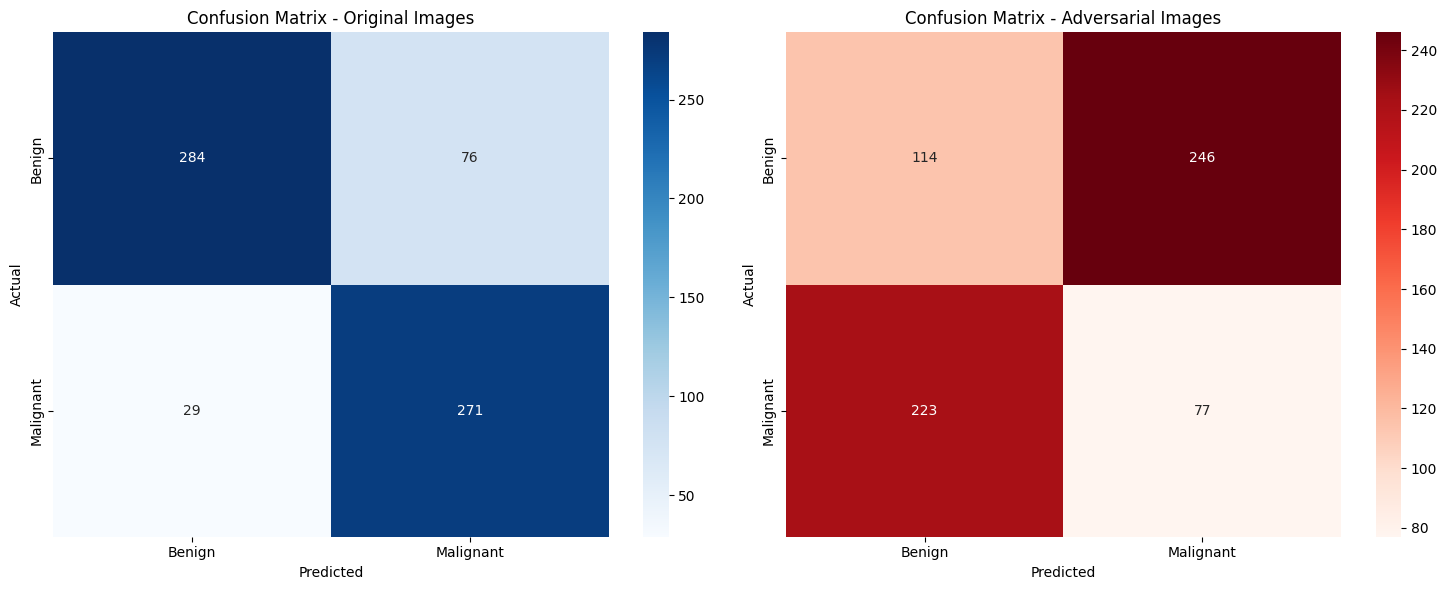


Visualizing adversarial examples...


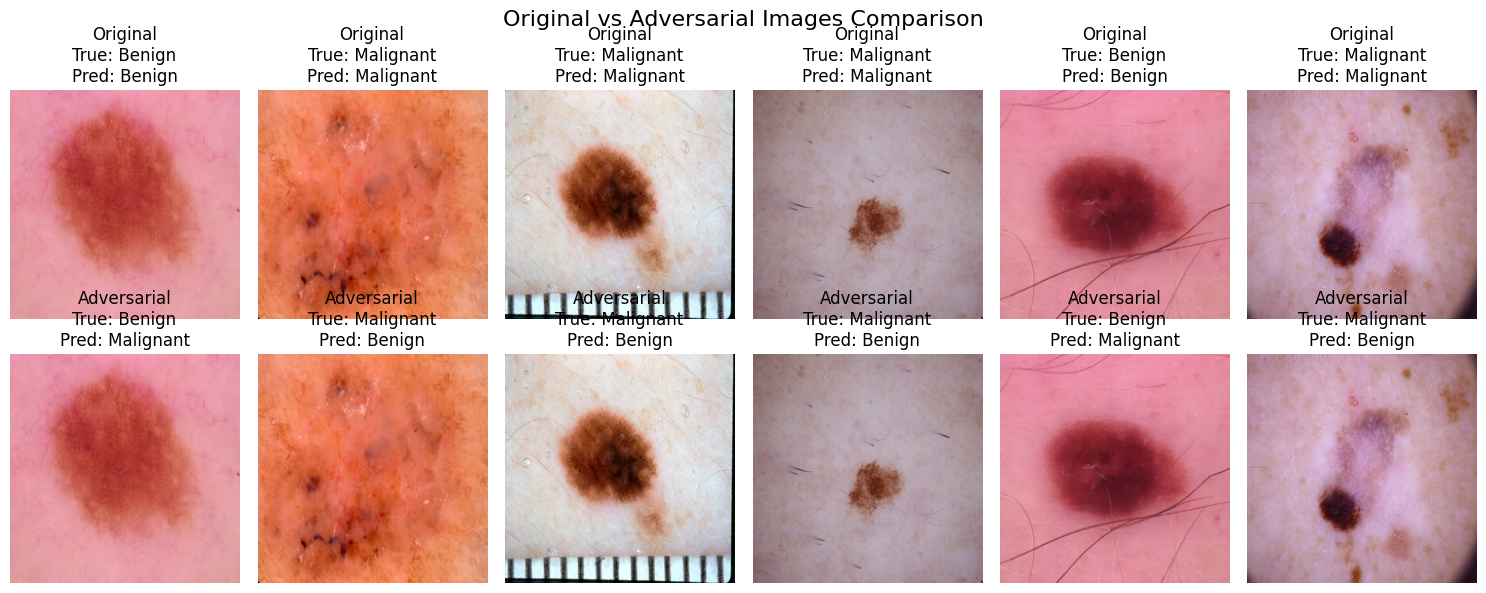


Classification Report - Original Images:
              precision    recall  f1-score   support

      Benign       0.91      0.79      0.84       360
   Malignant       0.78      0.90      0.84       300

    accuracy                           0.84       660
   macro avg       0.84      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660


Classification Report - Adversarial Images:
              precision    recall  f1-score   support

      Benign       0.34      0.32      0.33       360
   Malignant       0.24      0.26      0.25       300

    accuracy                           0.29       660
   macro avg       0.29      0.29      0.29       660
weighted avg       0.29      0.29      0.29       660


SUMMARY for Epsilon = 0.5:
Original Accuracy: 84%
Adversarial Accuracy: 29%
Accuracy Drop: 55%

Testing with Epsilon = 1.0
Starting FGSM Attack Implementation...
Test set size: 660
Epsilon (perturbation strength): 1.0
Generating adversarial examples with eps

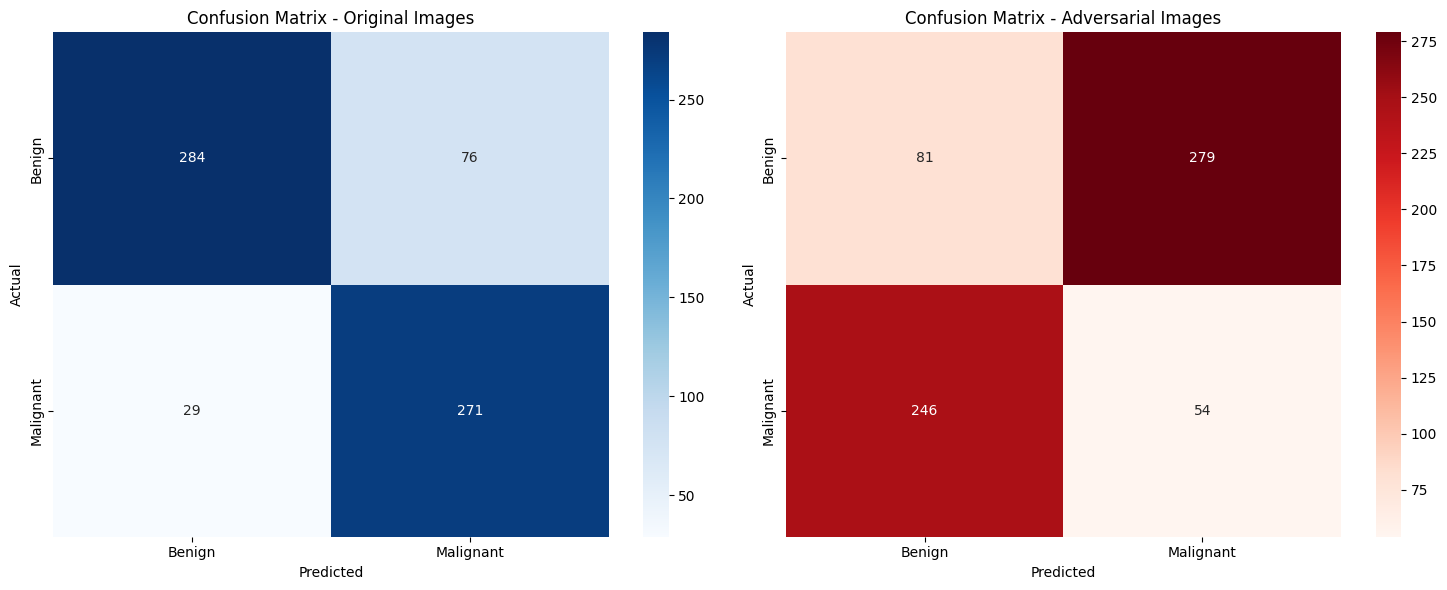


Visualizing adversarial examples...


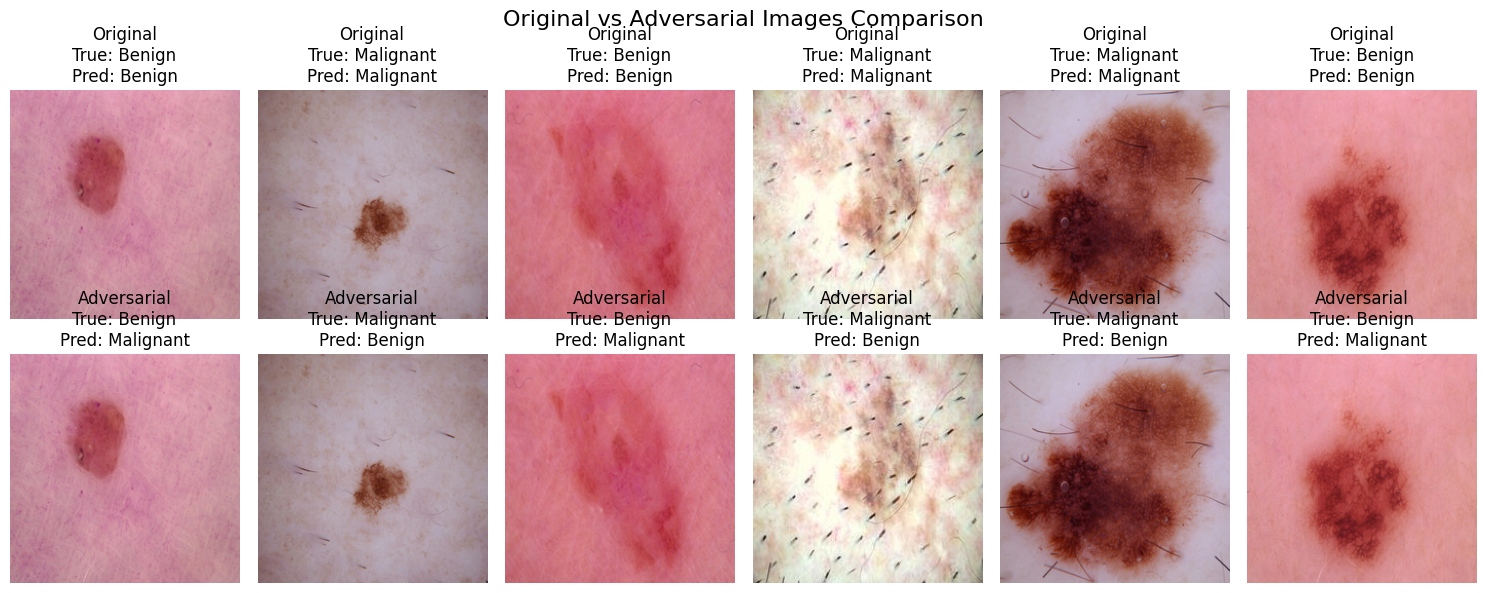


Classification Report - Original Images:
              precision    recall  f1-score   support

      Benign       0.91      0.79      0.84       360
   Malignant       0.78      0.90      0.84       300

    accuracy                           0.84       660
   macro avg       0.84      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660


Classification Report - Adversarial Images:
              precision    recall  f1-score   support

      Benign       0.25      0.23      0.24       360
   Malignant       0.16      0.18      0.17       300

    accuracy                           0.20       660
   macro avg       0.20      0.20      0.20       660
weighted avg       0.21      0.20      0.21       660


SUMMARY for Epsilon = 1.0:
Original Accuracy: 84%
Adversarial Accuracy: 20%
Accuracy Drop: 64%

Testing with Epsilon = 2.55
Starting FGSM Attack Implementation...
Test set size: 660
Epsilon (perturbation strength): 2.55
Generating adversarial examples with e

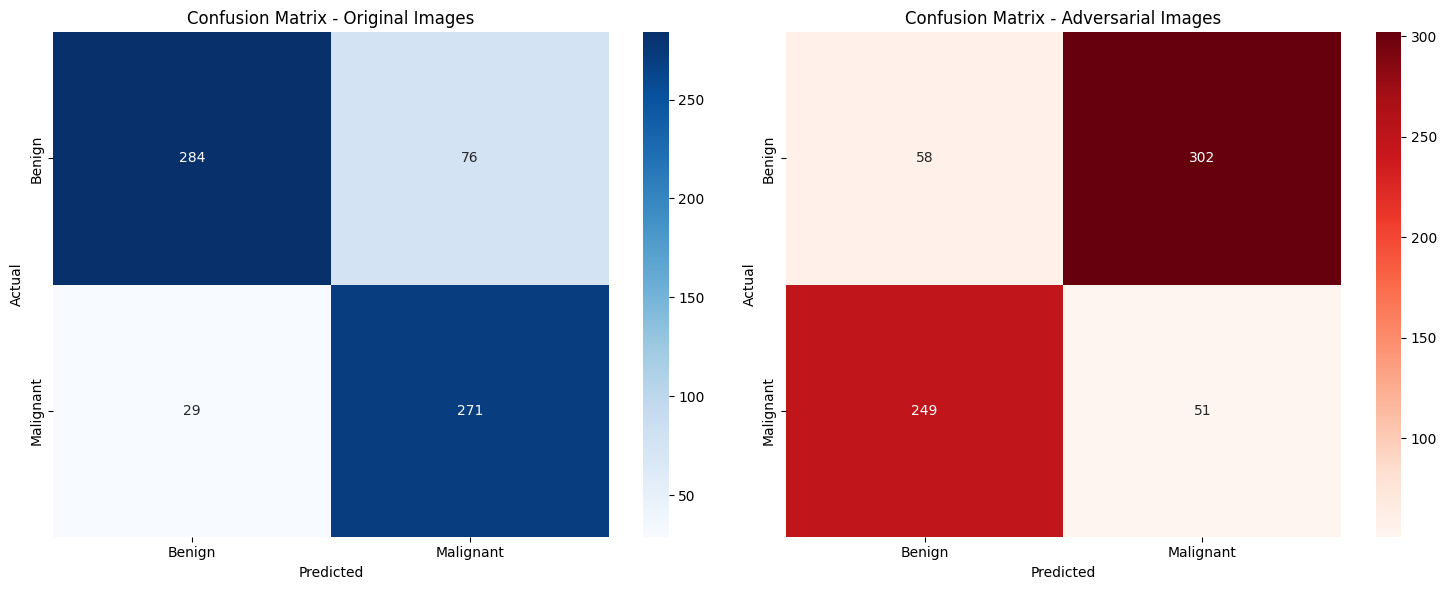


Visualizing adversarial examples...


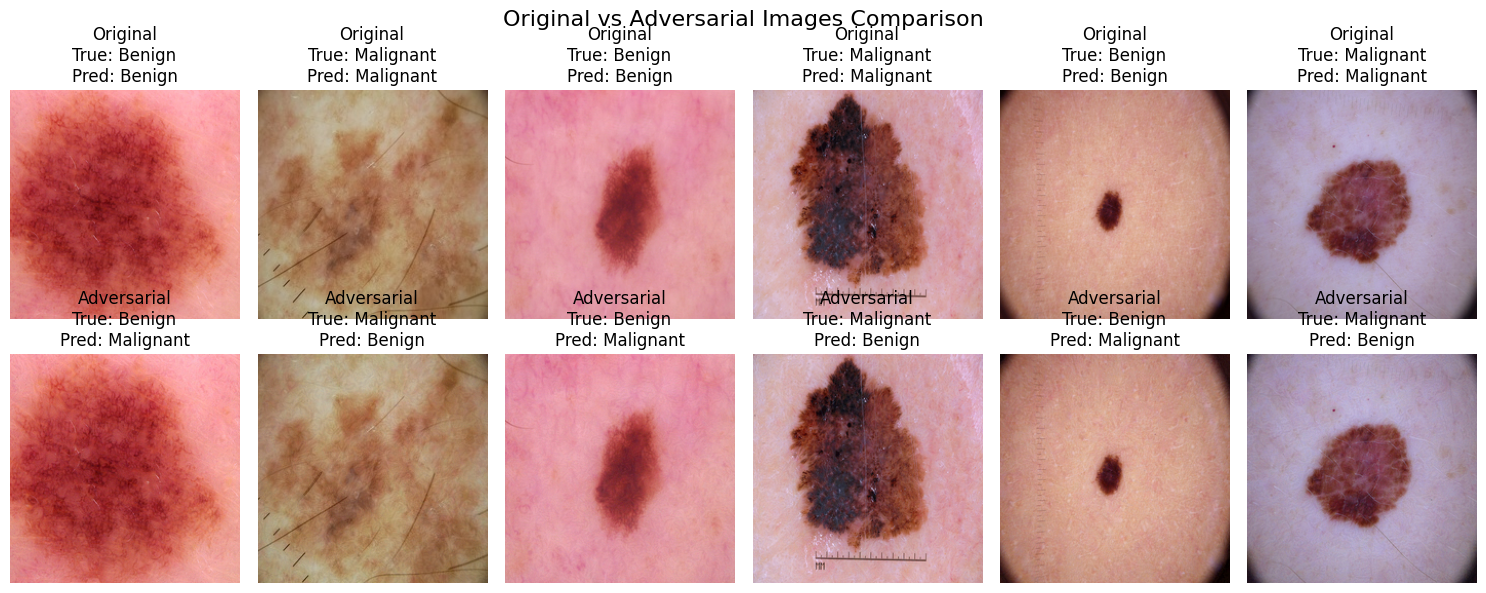


Classification Report - Original Images:
              precision    recall  f1-score   support

      Benign       0.91      0.79      0.84       360
   Malignant       0.78      0.90      0.84       300

    accuracy                           0.84       660
   macro avg       0.84      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660


Classification Report - Adversarial Images:
              precision    recall  f1-score   support

      Benign       0.19      0.16      0.17       360
   Malignant       0.14      0.17      0.16       300

    accuracy                           0.17       660
   macro avg       0.17      0.17      0.17       660
weighted avg       0.17      0.17      0.17       660


SUMMARY for Epsilon = 2.55:
Original Accuracy: 84%
Adversarial Accuracy: 17%
Accuracy Drop: 68%

Testing with Epsilon = 3.815
Starting FGSM Attack Implementation...
Test set size: 660
Epsilon (perturbation strength): 3.815
Generating adversarial examples wit

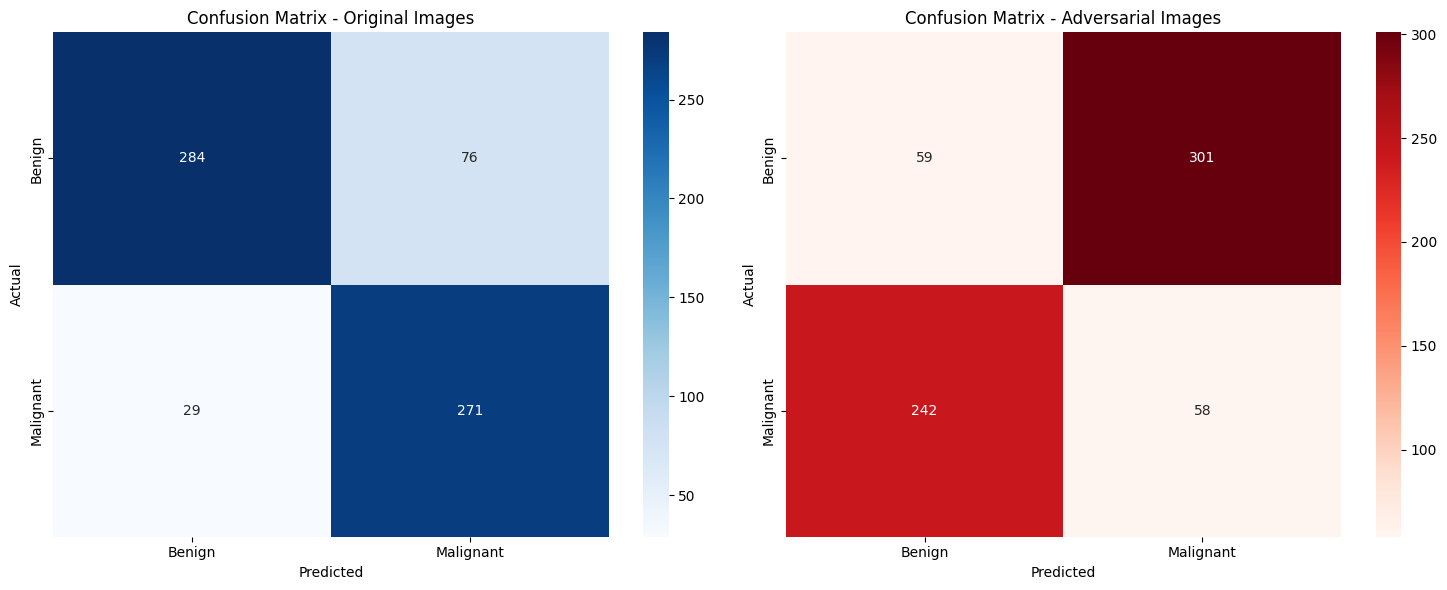


Visualizing adversarial examples...


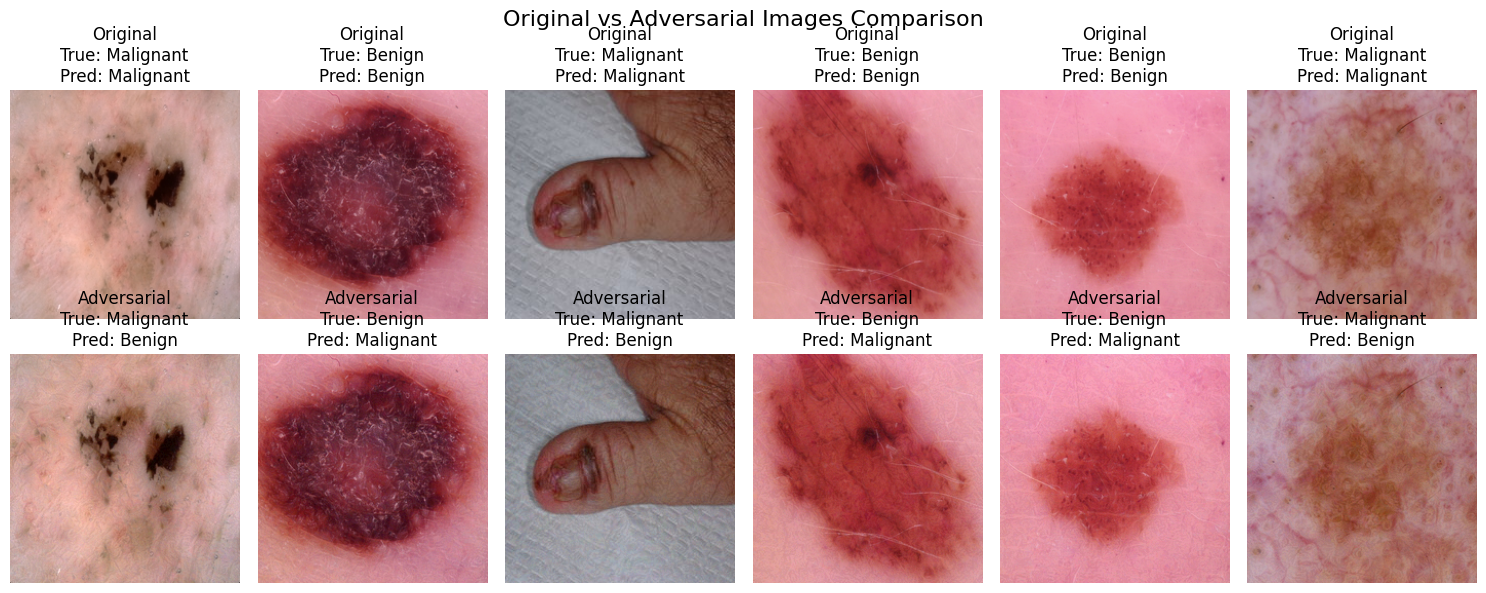


Classification Report - Original Images:
              precision    recall  f1-score   support

      Benign       0.91      0.79      0.84       360
   Malignant       0.78      0.90      0.84       300

    accuracy                           0.84       660
   macro avg       0.84      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660


Classification Report - Adversarial Images:
              precision    recall  f1-score   support

      Benign       0.20      0.16      0.18       360
   Malignant       0.16      0.19      0.18       300

    accuracy                           0.18       660
   macro avg       0.18      0.18      0.18       660
weighted avg       0.18      0.18      0.18       660


SUMMARY for Epsilon = 3.815:
Original Accuracy: 84%
Adversarial Accuracy: 18%
Accuracy Drop: 66%


In [ ]:
print("\n" + "="*60)
print("PART 2: IMPLEMENTING FGSM ATTACK")
print("="*60)

# Make sure your test data is in the right format
# If your images are in [0,255] range, normalize them to [0,1]
# if X_test.max() > 1.0:
#     X_test_normalized = X_test / 255.0
# else:
#     X_test_normalized = X_test

# print(f"Test data shape: {X_test_normalized.shape}")
# print(f"Test data range: [{X_test_normalized.min():.3f}, {X_test_normalized.max():.3f}]")
# print(f"Test labels shape: {y_test_onehot.shape}")

print(f"Test data shape: {X_test.shape}")
print(f"Test data range: [{X_test.min():.3f}, {X_test.max():.3f}]")
print(f"Test labels shape: {y_test_onehot.shape}")

# Run FGSM attack with different epsilon values
# Note: These epsilon values are for raw pixel space (0-255)
epsilon_values = [0.5, 1.0, 2.55, 3.815]  # Different perturbation strengths
results_data = []

for eps in epsilon_values:
    print(f"\n{'='*40}")
    print(f"Testing with Epsilon = {eps}")
    print(f"{'='*40}")

    # Run FGSM attack
    X_adversarial, original_pred, adversarial_pred = run_fgsm_attack(
        model=model,
        X_test=X_test,    # Raw images, no normalizations needed
        y_test_onehot=y_test_onehot,
        class_names=['Benign', 'Malignant'],
        epsilon=eps
    )

    # Calculate metrics similar to the paper
    true_labels = np.argmax(y_test_onehot, axis=1)
    original_accuracy = np.mean(original_pred == true_labels) * 100
    adversarial_accuracy = np.mean(adversarial_pred == true_labels) * 100

    results_data.append({
    'epsilon': eps,
    'original_accuracy': original_accuracy,
    'adversarial_accuracy': adversarial_accuracy,
    'accuracy_drop': original_accuracy - adversarial_accuracy
    })

    print(f"\nSUMMARY for Epsilon = {eps}:")
    print(f"Original Accuracy: {original_accuracy:.0f}%")
    print(f"Adversarial Accuracy: {adversarial_accuracy:.0f}%")
    print(f"Accuracy Drop: {original_accuracy - adversarial_accuracy:.0f}%")

    # Save adversarial examples if needed
    # np.save(f'adversarial_examples_eps_{eps}.npy', X_adversarial)


In [ ]:
# Additional analysis: Attack success rate
def analyze_attack_success(original_pred, adversarial_pred, true_labels, class_names):
    """
    Analyze attack success rate per class
    """
    print("\nATTACK SUCCESS ANALYSIS:")
    print("-" * 30)

    for i, class_name in enumerate(class_names):
        class_mask = (true_labels == i)
        class_original = original_pred[class_mask]
        class_adversarial = adversarial_pred[class_mask]

        # Originally correctly classified
        correctly_classified = (class_original == i)

        # Among correctly classified, how many became misclassified
        if np.sum(correctly_classified) > 0:
            attack_success = np.sum(class_adversarial[correctly_classified] != i)
            success_rate = attack_success / np.sum(correctly_classified) * 100
            print(f"{class_name}: {attack_success}/{np.sum(correctly_classified)} "
                  f"({success_rate:.1f}%) successfully attacked")

# Run attack success analysis for the last epsilon value
analyze_attack_success(original_pred, adversarial_pred, true_labels, ['Benign', 'Malignant'])

print(f"\n{'='*60}")
print("FGSM ATTACK IMPLEMENTATION COMPLETED")
print("="*60)


ATTACK SUCCESS ANALYSIS:
------------------------------
Benign: 225/284 (79.2%) successfully attacked
Malignant: 213/271 (78.6%) successfully attacked

FGSM ATTACK IMPLEMENTATION COMPLETED


**Analysis of FGSM attack**

In [ ]:
# Extract data for plotting
epsilons = [r['epsilon'] for r in results_data]
original_accs = [r['original_accuracy'] for r in results_data]
adversarial_accs = [r['adversarial_accuracy'] for r in results_data]
accuracy_drops = [r['accuracy_drop'] for r in results_data]

In [ ]:
# Create the visualization
import matplotlib.pyplot as plt
import numpy as np

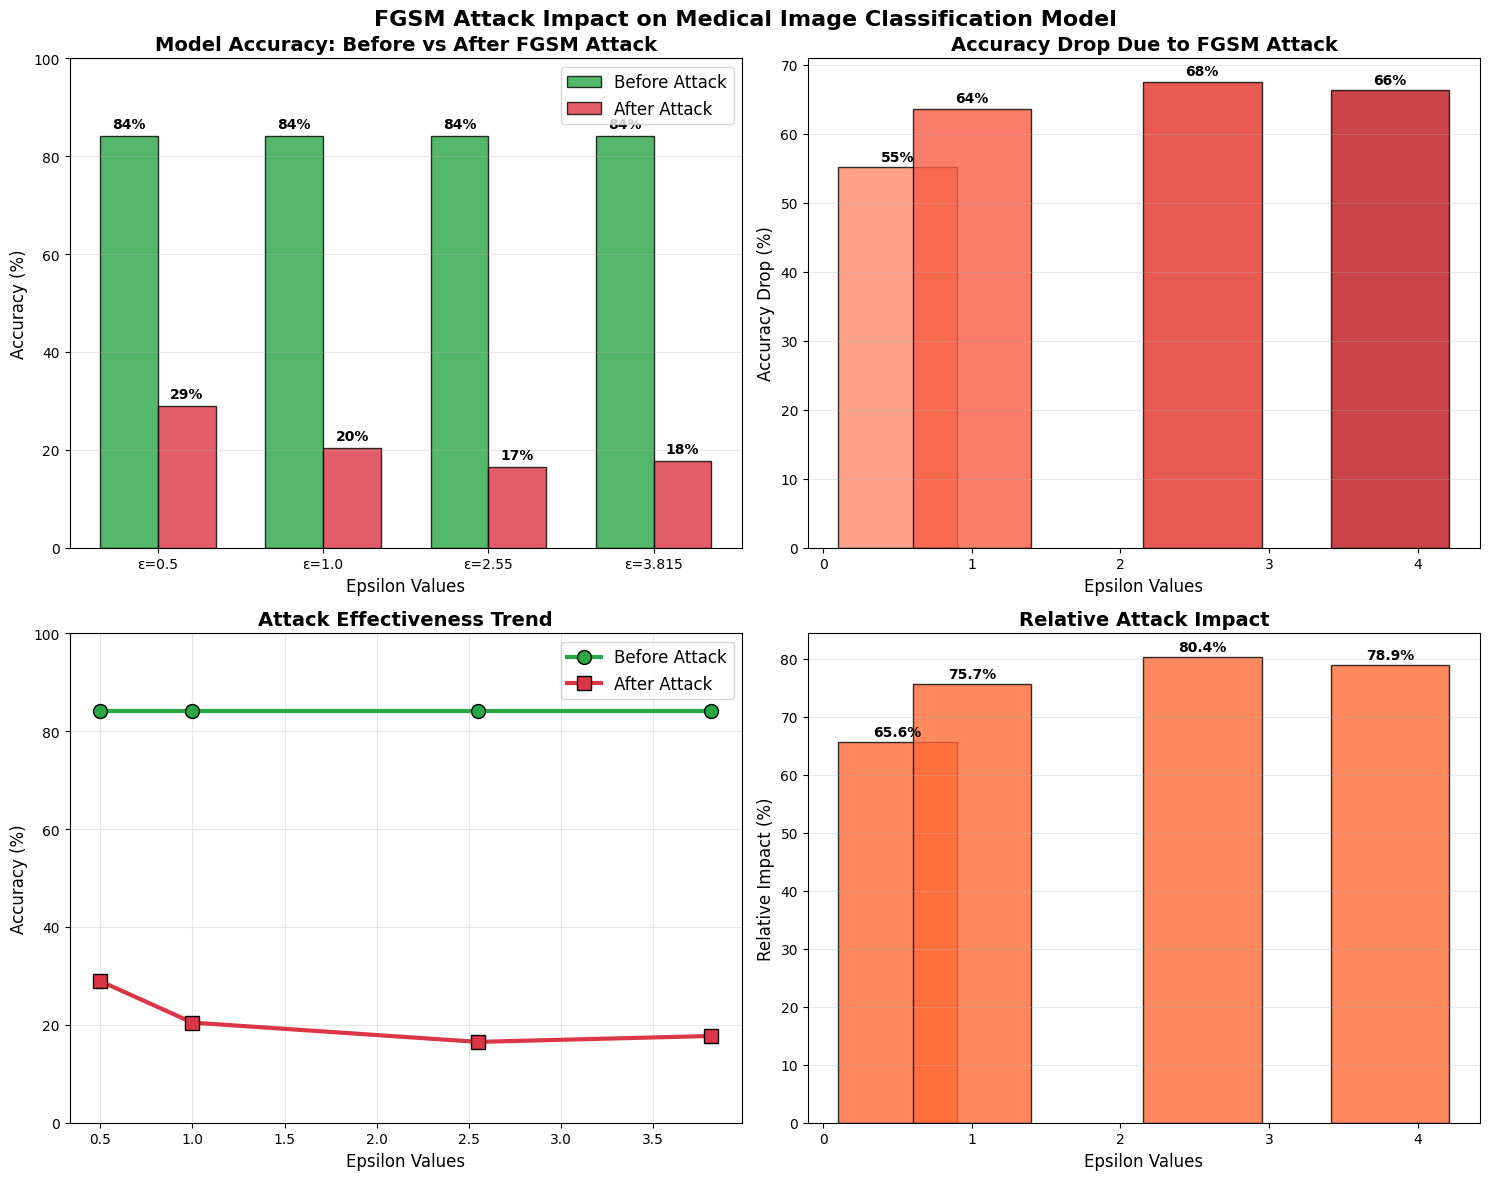

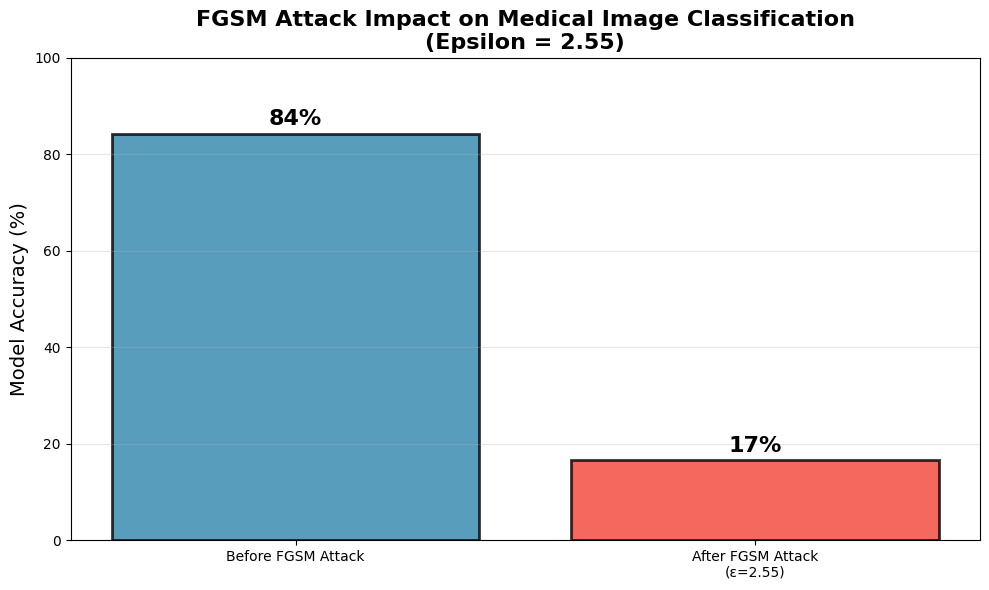


FINAL RESULTS SUMMARY TABLE
Epsilon    Original Acc    Adversarial Acc    Accuracy Drop   Relative Impact
----------------------------------------------------------------------
0.5        84.1           % 28.9              % 55.2           % 65.6           %
1.0        84.1           % 20.5              % 63.6           % 75.7           %
2.55       84.1           % 16.5              % 67.6           % 80.4           %
3.815      84.1           % 17.7              % 66.4           % 78.9           %

📊 KEY FINDINGS:
   • Model is vulnerable to FGSM attacks
   • Worst case: 68% accuracy drop at ε=2.55
   • Model accuracy degraded from 84% to 17%
   • Attack effectiveness increases with epsilon value


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('FGSM Attack Impact on Medical Image Classification Model', fontsize=16, fontweight='bold')

# Chart 1: Side-by-side comparison
x_pos = np.arange(len(epsilons))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, original_accs, width,
               label='Before Attack', color='#28a745', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, adversarial_accs, width,
               label='After Attack', color='#dc3545', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Epsilon Values', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_title('Model Accuracy: Before vs After FGSM Attack', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'ε={eps}' for eps in epsilons])
ax1.legend(fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 100)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.0f}%', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.0f}%', ha='center', va='bottom', fontweight='bold')

# Chart 2: Accuracy drop
colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(epsilons)))
bars3 = ax2.bar(epsilons, accuracy_drops, color=colors, alpha=0.8, edgecolor='black')
ax2.set_xlabel('Epsilon Values', fontsize=12)
ax2.set_ylabel('Accuracy Drop (%)', fontsize=12)
ax2.set_title('Accuracy Drop Due to FGSM Attack', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.0f}%', ha='center', va='bottom', fontweight='bold')

# Chart 3: Line plot
ax3.plot(epsilons, original_accs, 'o-', color='#28a745',
         linewidth=3, markersize=10, label='Before Attack', markeredgecolor='black')
ax3.plot(epsilons, adversarial_accs, 's-', color='#dc3545',
         linewidth=3, markersize=10, label='After Attack', markeredgecolor='black')
ax3.set_xlabel('Epsilon Values', fontsize=12)
ax3.set_ylabel('Accuracy (%)', fontsize=12)
ax3.set_title('Attack Effectiveness Trend', fontsize=14, fontweight='bold')
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 100)

# Chart 4: Attack impact percentage
impact_percentages = [(orig - adv) / orig * 100 for orig, adv in zip(original_accs, adversarial_accs)]
bars4 = ax4.bar(epsilons, impact_percentages, color='#ff6b35', alpha=0.8, edgecolor='black')
ax4.set_xlabel('Epsilon Values', fontsize=12)
ax4.set_ylabel('Relative Impact (%)', fontsize=12)
ax4.set_title('Relative Attack Impact', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a simple comparison chart (similar to your reference image)
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

# Using the most impactful epsilon for comparison (usually the largest one)
max_impact_idx = np.argmax(accuracy_drops)
before_acc = original_accs[max_impact_idx]
after_acc = adversarial_accs[max_impact_idx]
eps_val = epsilons[max_impact_idx]

categories = ['Before FGSM Attack', f'After FGSM Attack\n(ε={eps_val})']
accuracies = [before_acc, after_acc]
colors = ['#2E86AB', '#F24236']

bars = ax.bar(categories, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax.set_ylabel('Model Accuracy (%)', fontsize=14)
ax.set_title(f'FGSM Attack Impact on Medical Image Classification\n(Epsilon = {eps_val})',
             fontsize=16, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.0f}%', ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*70)
print("FINAL RESULTS SUMMARY TABLE")
print("="*70)
print(f"{'Epsilon':<10} {'Original Acc':<15} {'Adversarial Acc':<18} {'Accuracy Drop':<15} {'Relative Impact'}")
print("-" * 70)
for i, eps in enumerate(epsilons):
    rel_impact = impact_percentages[i]
    print(f"{eps:<10} {original_accs[i]:<15.1f}% {adversarial_accs[i]:<18.1f}% "
          f"{accuracy_drops[i]:<15.1f}% {rel_impact:<15.1f}%")

print(f"\n📊 KEY FINDINGS:")
print(f"   • Model is vulnerable to FGSM attacks")
print(f"   • Worst case: {max(accuracy_drops):.0f}% accuracy drop at ε={epsilons[np.argmax(accuracy_drops)]}")
print(f"   • Model accuracy degraded from {original_accs[0]:.0f}% to {min(adversarial_accs):.0f}%")
print(f"   • Attack effectiveness increases with epsilon value")